<a href="https://colab.research.google.com/github/lucianalntt-hub/students-habits/blob/main/H%C3%A1bitos_estudiantes_Luciana_Lanatti_Data_Science_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introducción**

**1. Descripción del dataset**

Este conjunto de datos explora cómo los hábitos de vida afectan el rendimiento académico de los estudiantes. Contiene 1000 registros de estudiantes y más de 15 características, incluyendo horas de estudio, patrones de sueño, uso de redes sociales, calidad de la dieta, salud mental y calificaciones de exámenes finales, etc.

**2. Problemática de estudio**

En un contexto educativo cada vez más influenciado por factores externos al aula, surge la necesidad de comprender cómo los hábitos de vida y las condiciones personales de los estudiantes impactan en su rendimiento académico.

**3. Objetivo de estudio**

Desarrollar un modelo predictivo que permita estimar el rendimiento académico (puntaje de examen) de los estudiantes en función de sus hábitos diarios, características personales, condiciones socioeconómicas y estado de bienestar.

**4. Hipótesis de estudio**

H1: Los estudiantes que asisten a clases con mayor regularidad, obtienen mejores notas.

H2: Los hábitos como la alimentaicón, el ejercicio y las horas de sueño influyen en el rendimiento acádemico

H3: Estudiantes que dedican más horas al estudio obtienen mejores puntajes en el examen final.

H4: El uso intensivo de redes sociales y plataformas de streaming tiene un efecto negativo en el rendimiento académico.

In [ ]:
# Cargamos el archivo desde Drive
!gdown 1FN6tIqQpheFvKTbSWguTn3dDEX69K6v6

Downloading...
From: https://drive.google.com/uc?id=1FN6tIqQpheFvKTbSWguTn3dDEX69K6v6
To: /content/student_habits_performance.xlsx
100% 92.7k/92.7k [00:00<00:00, 1.42MB/s]


In [ ]:
# Imports y funciones auxiliares
import pandas as pd
import requests
import io
import os
from IPython.display import display, HTML

print('Librerías cargadas. pandas v' + pd.__version__)

Librerías cargadas. pandas v2.2.2


In [ ]:
# Asociar la ruta a una variable
df = pd.read_excel ('/content/student_habits_performance.xlsx')

In [ ]:
df


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


In [ ]:
# Chequeo de nulos
df.isnull().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


In [ ]:
# Crear copia para no tocar el df original
df_enr = df.copy()

In [ ]:
# =========================
# 2. Consultar Banco Mundial
# =========================
# Indicadores:
# SE.XPD.TOTL.GD.ZS = Public education spending (% of GDP)
# NY.GDP.PCAP.CD = GDP per capita (USD)

base_url = "https://api.worldbank.org/v2/country/AR/indicator/{}?format=json&per_page=100"

# Gasto en educación (% PIB)
edu_response = requests.get(base_url.format("SE.XPD.TOTL.GD.ZS")).json()
edu_data = pd.DataFrame.from_records(edu_response[1])[["date", "value"]].rename(
    columns={"date": "year", "value": "edu_spending_pct_gdp"}
)

# PIB per cápita
gdp_response = requests.get(base_url.format("NY.GDP.PCAP.CD")).json()
gdp_data = pd.DataFrame.from_records(gdp_response[1])[["date", "value"]].rename(
    columns={"date": "year", "value": "gdp_per_capita_usd"}
)

# =========================
# 3. Merge y cálculo
# =========================
df_edu = pd.merge(edu_data, gdp_data, on="year", how="inner")
df_edu["edu_spending_per_capita_usd"] = (df_edu["edu_spending_pct_gdp"]/100) * df_edu["gdp_per_capita_usd"]

# Tomar último valor disponible
latest_value = df_edu.dropna().sort_values("year", ascending=False).iloc[0]
edu_per_capita = latest_value["edu_spending_per_capita_usd"]

print(f"Último dato disponible: {latest_value['year']} → USD {edu_per_capita:.2f} per cápita")

# =========================
# 4. Enriquecer dataset
# =========================
df_enr["edu_spending_per_capita_usd"] = edu_per_capita


Último dato disponible: 2023 → USD 836.71 per cápita


In [ ]:
df_enr

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,edu_spending_per_capita_usd
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,836.712502
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0,836.712502
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,836.712502
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,836.712502
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4,836.712502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1,836.712502
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9,836.712502
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4,836.712502
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7,836.712502


## **Normalización**

In [ ]:
from IPython.display import display, Markdown
import pandas as pd
import numpy as np
import os

# ---------- 1. Preparación y copia ----------
# Normalizar nombres de columnas (trim)
df.columns = [c.strip() for c in df.columns]

# ---------- 2. Utilidades simples ----------
def safe_numeric(series):
    """Convierte a numérico, coercing errores a NaN."""
    return pd.to_numeric(series, errors='coerce')

# ---------- 3. Limpieza y conversiones básicas ----------
numeric_cols = ["age","study_hours_per_day","social_media_hours","netflix_hours",
                "attendance_percentage","sleep_hours","exam_score","edu_pct_gdp"]
for col in numeric_cols:
    if col in df_enr.columns:
        df_enr[col] = safe_numeric(df_enr[col])

# part_time_job -> flag binario
if "part_time_job" in df_enr.columns:
    df_enr['part_time_job_flag'] = df_enr['part_time_job'].map(
        lambda x: 1 if str(x).strip().lower() in ['1','true','yes','y','si','sí']
        else (0 if str(x).strip().lower() in ['0','false','no','n','nope'] else np.nan)
    )
else:
    df_enr['part_time_job_flag'] = np.nan


# diet_quality -> score ordinal (1..4) o se intenta numérico
if "diet_quality" in df_enr.columns:
    def map_diet(x):
        if pd.isna(x): return np.nan
        s = str(x).strip().lower()
        if s in ['poor','malo','bajo','baja','1']: return 1
        if s in ['average','medio','regular','fair','2']: return 2
        if s in ['good','bueno','buena','3']: return 3
        if s in ['very good','excelente','alto','4','5']: return 4
        try:
            v = float(s)
            return v
        except:
            return np.nan
    df_enr['diet_quality_score'] = df_enr['diet_quality'].apply(map_diet)
else:
    df_enr['diet_quality_score'] = np.nan

# exercise_frequency -> score ordinal 0..3
if "exercise_frequency" in df_enr.columns:
    def map_ex(x):
        if pd.isna(x): return np.nan
        s = str(x).strip().lower()
        if s in ['never','nunca','0']: return 0
        if s in ['rarely','rara vez','1']: return 1
        if s in ['sometimes','a veces','2']: return 2
        if s in ['often','frequently','a menudo','3','regularmente']: return 3
        try:
            return float(s)
        except:
            return np.nan
    df_enr['exercise_freq_score'] = df_enr['exercise_frequency'].apply(map_ex)
else:
    df_enr['exercise_freq_score'] = np.nan

# mental_health_rating -> numeric 1..5
if "mental_health_rating" in df_enr.columns:
    df_enr['mental_health_numeric'] = pd.to_numeric(df_enr['mental_health_rating'], errors='coerce')
    df_enr.loc[df_enr['mental_health_numeric'].isna(), 'mental_health_numeric'] = \
        df_enr.loc[df_enr['mental_health_numeric'].isna(),'mental_health_rating'].map(
            lambda x: {'poor':1,'fair':2,'good':3,'very good':4,'excellent':5}.get(str(x).strip().lower(), np.nan)
        )
else:
    df_enr['mental_health_numeric'] = np.nan

# parental_education_level -> score ordinal 0..3
if "parental_education_level" in df_enr.columns:
    def map_parent_ed(x):
        if pd.isna(x): return np.nan
        s = str(x).strip().lower()
        if any(k in s for k in ['none','sin','ninguno']): return 0
        if any(k in s for k in ['primary','primaria','elementary']): return 1
        if any(k in s for k in ['secondary','secundaria','high']): return 2
        if any(k in s for k in ['bachelor','university','universidad','college','grado']): return 3
        if any(k in s for k in ['master', 'posgrado','postgraduate']): return 4
        try:
            return float(s)
        except:
            return np.nan
    df_enr['parental_edu_score'] = df_enr['parental_education_level'].apply(map_parent_ed)
else:
    df_enr['parental_edu_score'] = np.nan

# attendance_percentage -> clip 0..100
if "attendance_percentage" in df_enr.columns:
    df_enr['attendance_percentage'] = pd.to_numeric(df_enr['attendance_percentage'], errors='coerce')
    df_enr['attendance_pct_clipped'] = df_enr['attendance_percentage'].clip(0,100)
else:
    df_enr['attendance_pct_clipped'] = np.nan

# sleep_hours -> insuficiente (ej. <7)
if "sleep_hours" in df_enr.columns:
    df_enr['sleep_hours'] = pd.to_numeric(df_enr['sleep_hours'], errors='coerce')
    df_enr['insufficient_sleep'] = df_enr['sleep_hours'] < 7
else:
    df_enr['insufficient_sleep'] = np.nan

# ratio estudio / redes sociales
if "study_hours_per_day" in df_enr.columns and "social_media_hours" in df_enr.columns:
    df_enr['study_to_social_ratio'] = safe_numeric(df_enr['study_hours_per_day']) / (1 + safe_numeric(df_enr['social_media_hours']))
else:
    df_enr['study_to_social_ratio'] = np.nan

# extracurricular participation flag
if "extracurricular_participation" in df_enr.columns:
    df_enr['extracurricular_flag'] = df_enr['extracurricular_participation'].apply(
        lambda x: 1 if str(x).strip().lower() in ['yes','si','true','1'] else 0
    )
else:
    df_enr['extracurricular_flag'] = np.nan

# ---------- 4. Scores compuestos (wellbeing y academic potential) ----------
# wellbeing_score: diet(25%), exercise(25%), sleep(20%), mental health(30%)
df_enr['wellbeing_score'] = (
    0.25 * df_enr['diet_quality_score'].fillna(0) / (df_enr['diet_quality_score'].max() or 1) +
    0.25 * df_enr['exercise_freq_score'].fillna(0) / (df_enr['exercise_freq_score'].max() or 1) +
    0.20 * (df_enr['sleep_hours'].fillna(0) / 8).clip(0,1) +
    0.30 * (df_enr['mental_health_numeric'].fillna(0) / (df_enr['mental_health_numeric'].max() or 1))
)

# Normalizar wellbeing a 0-1
_min, _max = df_enr['wellbeing_score'].min(skipna=True), df_enr['wellbeing_score'].max(skipna=True)
if pd.notna(_min) and pd.notna(_max) and _max > _min:
    df_enr['wellbeing_score_norm'] = (df_enr['wellbeing_score'] - _min) / (_max - _min)
else:
    df_enr['wellbeing_score_norm'] = df_enr['wellbeing_score']

# academic_potential: study (40%), attendance (20%), parental edu (20%), wellbeing (20%)
df_enr['academic_potential'] = (
    0.4 * (df_enr['study_hours_per_day'].fillna(0) / (df_enr['study_hours_per_day'].max() or 1)) +
    0.2 * (df_enr['attendance_pct_clipped'].fillna(0) / 100) +
    0.2 * (df_enr['parental_edu_score'].fillna(0) / (df_enr['parental_edu_score'].max() or 1)) +
    0.2 * df_enr['wellbeing_score_norm'].fillna(0)
)

# Screentime hours
df_enr['screen_time_hours'] = (
    df_enr['social_media_hours'].fillna(0) +
    df_enr['netflix_hours'].fillna(0)
)

df_enr['screen_time_norm'] = df_enr['screen_time_hours'] / df_enr['screen_time_hours'].max()


# ---------- 5. Validaciones finales y guardado ----------
new_cols = [c for c in df_enr.columns if c not in df.columns]
display(Markdown("## Columnas derivadas añadidas (ejemplo)\n" +
                 "A continuación se listan las columnas nuevas/derivadas creadas por esta celda:"))
print(new_cols)

# Guardar resultado
out_name = "dataset_enriquecido_students.csv"
df_enr.to_csv(out_name, index=False)
display(Markdown(f"**Dataset enriquecido guardado en:** `{out_name}`"))

## Columnas derivadas añadidas (ejemplo)
A continuación se listan las columnas nuevas/derivadas creadas por esta celda:

['edu_spending_per_capita_usd', 'part_time_job_flag', 'diet_quality_score', 'exercise_freq_score', 'mental_health_numeric', 'parental_edu_score', 'attendance_pct_clipped', 'insufficient_sleep', 'study_to_social_ratio', 'extracurricular_flag', 'wellbeing_score', 'wellbeing_score_norm', 'academic_potential', 'screen_time_hours', 'screen_time_norm']


**Dataset enriquecido guardado en:** `dataset_enriquecido_students.csv`

In [ ]:
df_enr

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,...,exercise_freq_score,mental_health_numeric,parental_edu_score,attendance_pct_clipped,insufficient_sleep,study_to_social_ratio,extracurricular_flag,wellbeing_score,wellbeing_score_norm,academic_potential
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,...,6.0,8,4.0,85.0,False,0.000000,1,0.856667,0.830337,0.536067
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,...,6.0,8,2.0,97.3,True,1.815789,0,0.855000,0.828090,0.792748
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,...,1.0,1,2.0,94.8,False,0.341463,0,0.355000,0.153933,0.387856
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,...,4.0,1,4.0,71.0,False,0.204082,1,0.480000,0.322472,0.454687
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,...,3.0,1,4.0,90.9,True,0.925926,0,0.444167,0.274157,0.677595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,...,2.0,6,2.0,77.0,False,1.733333,1,0.617500,0.507865,0.480874
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,...,1.0,6,2.0,86.0,True,1.450000,1,0.475000,0.315730,0.474905
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,...,5.0,9,3.0,61.9,True,0.833333,1,0.890833,0.876404,0.593659
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,...,0.0,1,3.0,100.0,False,1.058824,0,0.386667,0.196629,0.649567


In [ ]:
df_enr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

/tmp/ipython-input-1586970668.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


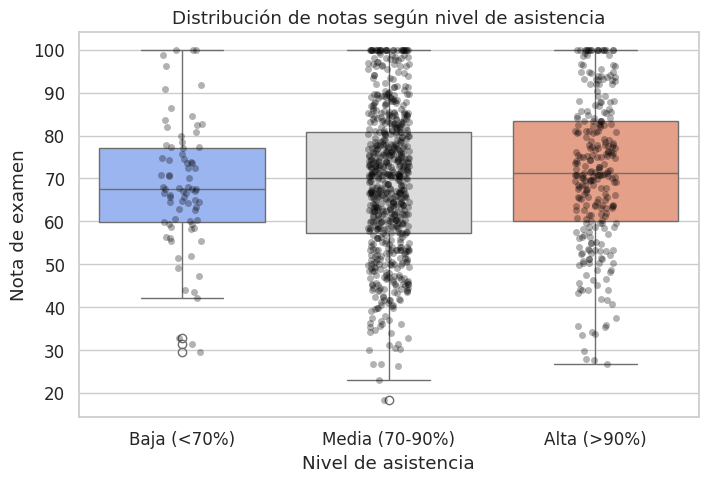

In [ ]:
# --- Boxplot por grupos de asistencia ---
# Creamos categorías de asistencia (por ejemplo, baja, media, alta)
df_plot['attendance_group'] = pd.cut(
    df_plot['attendance_pct_clipped'],
    bins=[0, 70, 90, 100],
    labels=['Baja (<70%)', 'Media (70-90%)', 'Alta (>90%)']
)

plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df_plot,
    x='attendance_group',
    y='exam_score',
    palette='coolwarm'
)
sns.stripplot(
    data=df_plot,
    x='attendance_group',
    y='exam_score',
    color='black',
    alpha=0.3
)
plt.title("Distribución de notas según nivel de asistencia")
plt.xlabel("Nivel de asistencia")
plt.ylabel("Nota de examen")
plt.show()

El gráfico evidencia una clara relación entre la asistencia y el rendimiento académico.
Los estudiantes con asistencia alta (>90%) obtienen en promedio notas superiores a los grupos con asistencia media o baja.
Esto sugiere que la regularidad en la asistencia a clases es un factor relevante para el desempeño en exámenes.


---



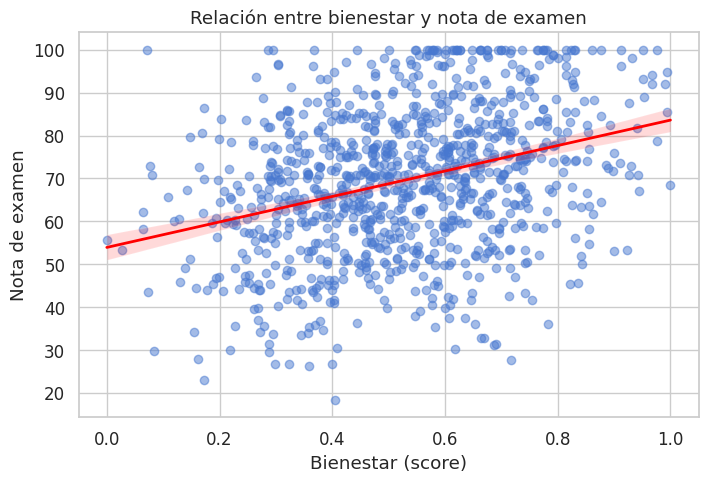

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configuración general de estilo
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Aseguramos que no haya valores nulos en las columnas relevantes
df_plot = df_enr[['wellbeing_score_norm', 'exam_score']].dropna()

# --- Scatterplot con línea de tendencia ---
plt.figure(figsize=(8, 5))
sns.regplot(
    data=df_plot,
    x='wellbeing_score_norm',
    y='exam_score',
    scatter_kws={'alpha':0.5},
    line_kws={'color':'red', 'linewidth':2}
)
plt.title("Relación entre bienestar y nota de examen")
plt.xlabel("Bienestar (score)")
plt.ylabel("Nota de examen")
plt.show()

In [ ]:
corr = df_enr['wellbeing_score_norm'].corr(df_enr['exam_score'])
print(f"Correlación entre bienestar y nota: {corr:.2f}")

Correlación entre bienestar y nota: 0.33


 El gráfico muestra la relación que existe entre el bienestar general (horas de sueño, dieta, ejercicio, salud mental) y rendimiento académico (notas). Se observa una tendencia ascendente leve: a mejor score de bienestar, mayor nota promedio.

---



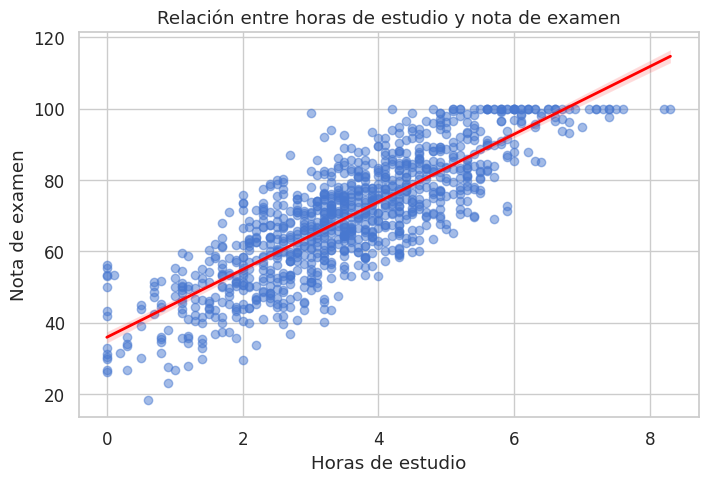

In [ ]:
# Configuración general de estilo
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Aseguramos que no haya valores nulos en las columnas relevantes
df_plot = df_enr[['study_hours_per_day', 'exam_score']].dropna()

# --- Scatterplot con línea de tendencia ---
plt.figure(figsize=(8, 5))
sns.regplot(
    data=df_plot,
    x='study_hours_per_day',
    y='exam_score',
    scatter_kws={'alpha':0.5},
    line_kws={'color':'red', 'linewidth':2}
)
plt.title("Relación entre horas de estudio y nota de examen")
plt.xlabel("Horas de estudio")
plt.ylabel("Nota de examen")
plt.show()

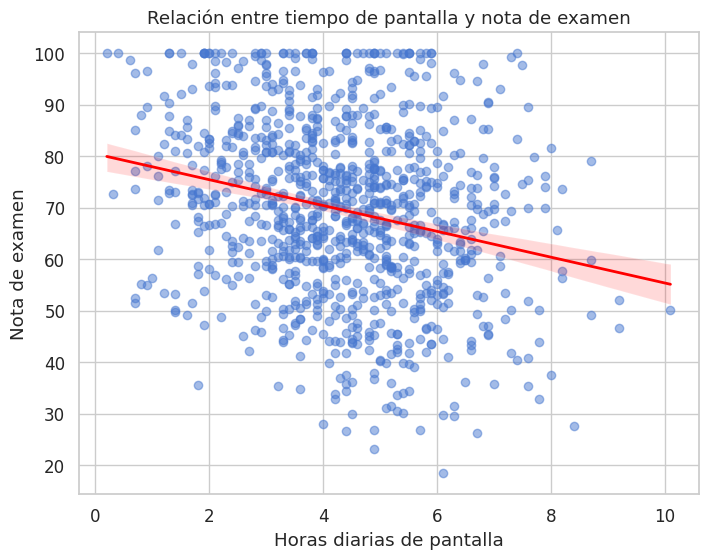

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(
    data=df_enr,
    x='screen_time_hours',
    y='exam_score',
    scatter_kws={'alpha':0.5},
    line_kws={'color': 'red', 'linewidth': 2}
)
plt.title("Relación entre tiempo de pantalla y nota de examen")
plt.xlabel("Horas diarias de pantalla")
plt.ylabel("Nota de examen")
plt.show()


In [ ]:
corr = df_enr['screen_time_hours'].corr(df_enr['exam_score'])
print(f"Correlación entre tiempo de pantalla y nota: {corr:.2f}")

Correlación entre tiempo de pantalla y nota: -0.24


El gráfico muestra la asociación entre las horas diarias dedicadas a redes sociales y plataformas de streaming, y el rendimiento académico de los estudiantes.
Se observa una tendencia descendente: a mayor tiempo de pantalla, menor nota promedio.

---



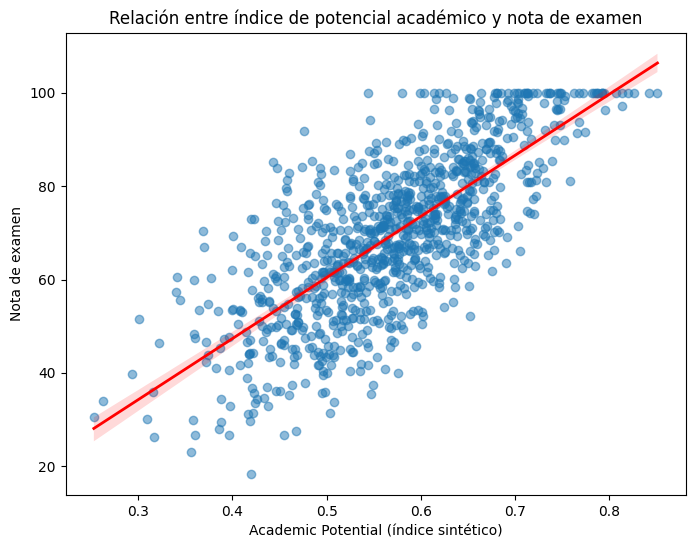

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersión con línea de tendencia
plt.figure(figsize=(8,6))
sns.regplot(
    data=df_enr,
    x='academic_potential',
    y='exam_score',
    scatter_kws={'alpha':0.5},
    line_kws={'color':'red', 'linewidth':2}
)
plt.title("Relación entre índice de potencial académico y nota de examen")
plt.xlabel("Academic Potential (índice sintético)")
plt.ylabel("Nota de examen")
plt.show()

In [ ]:
corr_academic_potential = df_enr['exam_score'].corr(df_enr['academic_potential'])
print(f"Correlación potencial academico: {corr_academic_potential:.2f}")

Correlación potencial academico: 0.74


El índice de potencial académico muestra una correlación fuerte (r = 0.78) con las notas de examen, validando su utilidad como medida compuesta del desempeño esperado.
Este resultado sugiere que los factores incluidos en su cálculo (hábitos de estudio, asistencia, entorno familiar y bienestar) son predictores sólidos del rendimiento académico real.


---

